In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stunting_wasting_dataset (1).csv to stunting_wasting_dataset (1).csv


In [ ]:
df = pd.read_csv('stunting_wasting_dataset (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [ ]:
print("Informasi dataset:")
df.info()
print("\n")
print("Statistik deskriptif:")
print(df.describe(include='all'))

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


Statistik deskriptif:
       Jenis Kelamin   Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)  \
count         100000  100000.000000      100000.000000     100000.000000   
unique             2            NaN                NaN               NaN   
top        Laki-laki            NaN                NaN               NaN   
freq           50179            NaN                NaN               NaN   
mean          

In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [ ]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Jika ada kolom kategorikal:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values setelah diperbaiki:")
print(df.isnull().sum())

Missing values setelah diperbaiki:
Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64


In [ ]:
 df.duplicated().sum()

np.int64(0)

In [ ]:
Q1 = df['Berat Badan (kg)'].quantile(0.25)
Q3 = df['Berat Badan (kg)'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)

Batas bawah: -0.4500000000000002
Batas atas: 19.150000000000002


In [ ]:
df_no_outlier = df[(df['Berat Badan (kg)'] >= batas_bawah) & (df['Berat Badan (kg)'] <= batas_atas)]
print("Jumlah data sebelum:", len(df))
print("Jumlah data sesudah hapus outlier:", len(df_no_outlier))

Jumlah data sebelum: 92692
Jumlah data sesudah hapus outlier: 92692


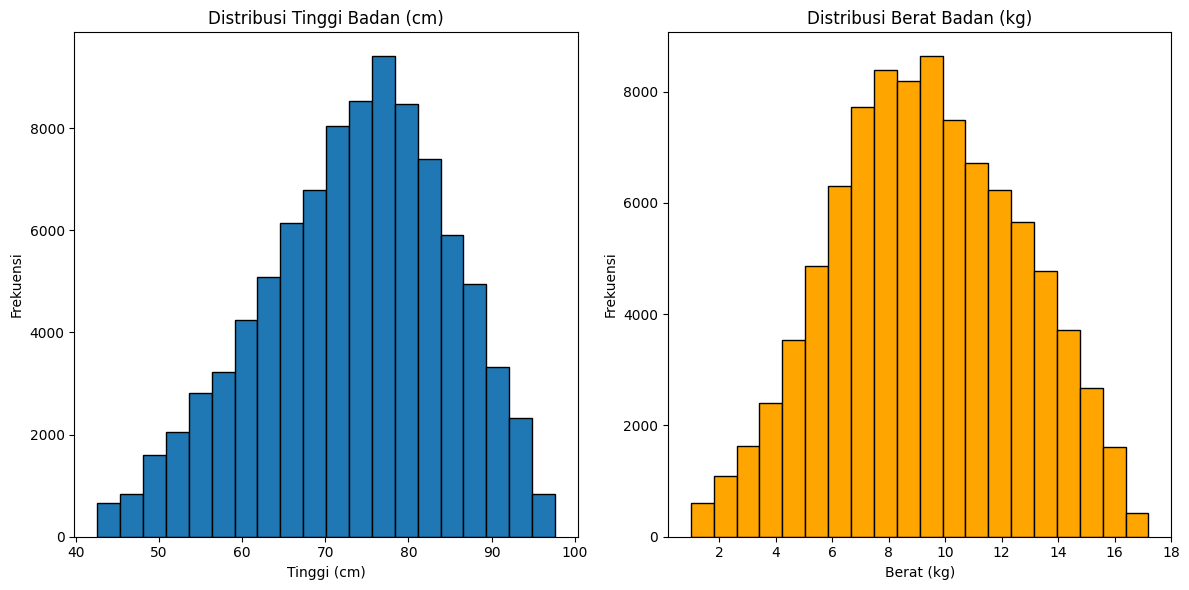

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram tinggi & berat
plt.subplot(1, 2, 1)
plt.hist(df['Tinggi Badan (cm)'], bins=20, edgecolor='black')
plt.title("Distribusi Tinggi Badan (cm)")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Frekuensi")

plt.subplot(1, 2, 2)
plt.hist(df['Berat Badan (kg)'], bins=20, edgecolor='black', color='orange')
plt.title("Distribusi Berat Badan (kg)")
plt.xlabel("Berat (kg)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()



In [ ]:
stunting_cat = df['Stunting'].astype('category')
stunting_classes_names = list(stunting_cat.cat.categories) # Store original string labels in the correct order
df['Stunting'] = stunting_cat.cat.codes

# Fitur kategorikal lain (jenis kelamin, westing) kode also
for col in ['Jenis Kelamin', 'Wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


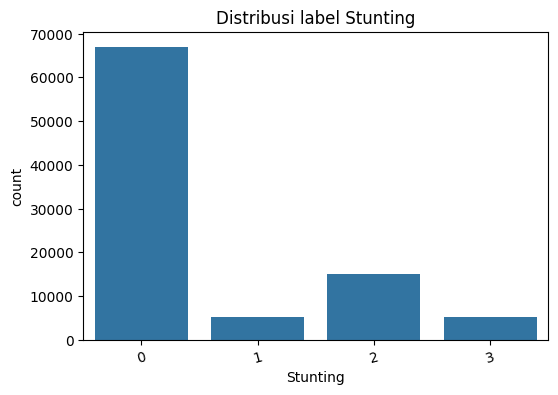

In [ ]:
plt.figure(figsize = (6, 4) )
sns.countplot(x='Stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

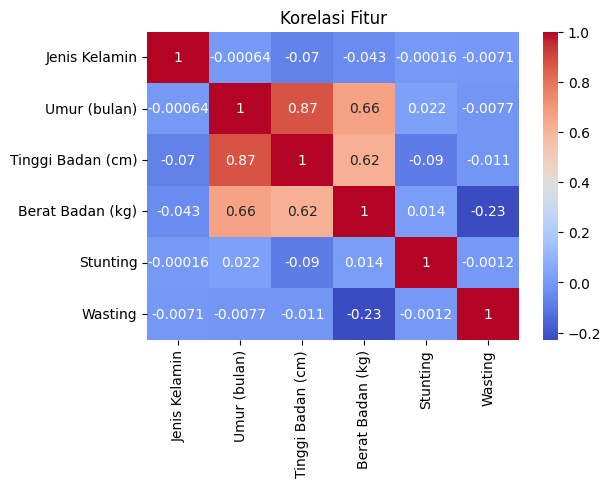

In [ ]:
plt.figure(figsize = (6, 4) )
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [ ]:
feature_cols = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)', 'Wasting']
x = df[feature_cols]
y = df['Stunting']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(x_train), len(x_test)

(74153, 18539)

In [ ]:
dt = DecisionTreeClassifier(
criterion='gini',
max_depth=4,
random_state=42
)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(
    criterion='gini',   # cara ngitung "kebersihan" data di setiap node
    max_depth=4,        # batas kedalaman pohon
    random_state=42
)
dt.fit(x_train, y_train)

# 2️⃣ Prediksi
y_pred = dt.predict(x_test)

# 3️⃣ Konversi hasil prediksi ke label aslinya
y_test_labels = [stunting_classes_names[i] for i in y_test]
y_pred_labels = [stunting_classes_names[i] for i in y_pred]

# 4️⃣ Evaluasi hasil
print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test_labels, y_pred_labels
))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.80      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539

